### Desafío 1: Determinantes del Ingreso

#### Enunciado:

##### Usted trabaja para un organismo no gubernamental que está interesado en las dinámicas socioeconómicas que determinan la desigualdad de ingreso y la erradicación de la pobreza extrema, enmarcado dentro de los objetivos del desarrollo del nuevo milenio del Programa de las Naciones Unidas para el Desarrollo. Le encomiendan el desarrollo de un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de atributos sociodemográficos

#### Preliminares:

- Problema: cómo obtener la probabilidad de que un individuo presente salarios por sobre o por debajo de los 50.000 dólares anuales en base a una serie de atributos demográficos

- Objetivos: Desarrollar un modelo predictivo que me permita obtener la probabilidad antes mencionada.

- Criterio y métodos: 
1. Se procederá a importar las librerías necesarias para el desarrollo del problema
2. Se importará el archivo "income-db" para hacer la limpieza y la correspondiente transformación de los datos necesarios para hacer el análisis
3. Una vez limpia y transformadas las variables de la base de datos se procederá a realizar el modelo a través de dos métodos. Una regresión logística a través de la econometría donde se analizará en términos generales el R2 (porcentaje de explicación del modelo, los p-value (rechazo/no rechazo de hipótesis nula de estimadores iguales a cero), AIC-BIC (comparación de modelos con mayor y menor cantidad de variables). El otro método se realizará a través de machine learning donde se analizará: accuracy (exactitud), precision, recall, f1 y una posterior curva ROC

#### Aspectos computacionales:

A continuación se importarán las librerías a utilizar para resolver el Desafío y que serán descriptas en este apartado el objetivo de las mismas.

- NumPy: extensión de Python, que le agrega mayor soporte para vectores y matrices, constituyendo una biblioteca de funciones matemáticas de alto nivel para operar con esos vectores o matrices. 
- Pandas: biblioteca de software escrita como extensión de NumPy para manipulación y análisis de datos para el lenguaje de programación Python. En particular, ofrece estructuras de datos y operaciones para manipular tablas numéricas y series temporales.
- Matplotlib: es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy.
- Scipy.stats: paquete para el análisis de estadística y probabilidades.
- Seaborn: librería de visualización de datos en Python basada en matplotlib. La idea de Seaborn es que los científicos de datos dispongan de una interfaz para hacer gráficos estadísticos atractivos e explicativos: el objetivo es visualizar datos complejos de forma sencilla y extraer conclusiones.
- Statsmodels: librería de análisis estadístico y econométrico en Python. Proporciona las capacidades para operaciones estadísticas, financieras y econométricas.
- Sklearn: librería especializada en algoritmos para data mining y machine learning. Para este caso resuelve problemas de clasificación y regresión y análisis de métricas resultantes.

Lista de funciones utilizadas para este desafío y breve descripción de su objetivo:
- Valores_perdidos: para obtener la cantidad de NaN y el porcentaje
- Histograma: devuelve gráficos de histograma para las variables numéricas del df, con su respectiva media y mediana sobre el eje de las x.
- inverse_logit: devuelve la probabilidad asociada a los logodds.
- graf_barra: devuelve gráficos de barra para las variables del tipo objetc en el df.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
plt.style.use("seaborn")

#### Descripción:

In [71]:
#Importación del archivo con el que se hará el análisis. Se agrega el warning para evitar avisos de deprecación

import warnings
warnings.filterwarnings(action="ignore")

df= pd.read_csv("income-db.csv")

In [3]:
#Traigo los primeros 5 registros para tener una visión rápida de mi df y sus variables

df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
#Con esa primera revisión más los detalles que agrega la descripción del problema, observamos valores perdidos bajo el signo
#"?" que reemplazo por NaN de NumPy y chequeo que se haya hecho la modificación correctamente

df= df.replace("?", np.NaN)

In [5]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
#Procedemos a recodificar las variables según se solicita en el enunciado del Desafío

#Cambio el nombre de las siguientes variables:

df=df.rename(columns={"occupation": "collars",
                     "workclass": "workclass_recod",
                     "education": "educ_recod",
                     "marital-status": "civstatus",
                     "native-country": "region"})

df.head()

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [7]:
#Recodifico las nomenclaturas de la variable collars

a= ["Prof-specialty", "Exec-managerial", "Adm-clerical", "Sales", "Tech-support"]
b= ["Craft-repair", "Machine-op-inspct", "Transport-moving", "Handlers-cleaners", "Farming-fishing", "Protective-serv", "Priv-house-serv"]
c= ["Other-service", "Armed-Forces"]

df["collars"]=df["collars"].replace(a, "white-collar")
df["collars"]=df["collars"].replace(b,"blue-collar")
df["collars"]=df["collars"].replace(c,"others")

In [8]:
#Recodifico las nomenclaturas de la variable workclass_recod

df["workclass_recod"]=df["workclass_recod"].replace("Federal-gov","federal-gov")
df["workclass_recod"]=df["workclass_recod"].replace(["State-gov", "Local-gov"], "state-level-gov")
df["workclass_recod"]=df["workclass_recod"].replace(["Self-emp-inc", "Self-emp-not-inc"], "self-employed")
df["workclass_recod"]=df["workclass_recod"].replace(["Never-worked", "Without-pay"], "unemployed")

#Recodifico las nomenclaturas de la variable educ_recod

df["educ_recod"]=df["educ_recod"].replace("Preschool", "preschool")
df["educ_recod"]=df["educ_recod"].replace(["1st-4th", "5th-6th"],"elementary-school")
df["educ_recod"]=df["educ_recod"].replace(["7th-8th", "9th", "10th","11th", "12th", "HS-grad"],"high-school")
df["educ_recod"]=df["educ_recod"].replace(["Assoc-voc", "Assoc-acdm", "Some-college"],"college")
df["educ_recod"]=df["educ_recod"].replace(["Bachelors", "Masters", "Prof-school", "Doctorate"], "university")

#Recodifico las nomenclaturas de la variable civstatus

df["civstatus"]=df["civstatus"].replace(["Married-civ-spouse", "Married-spouse-absent", "Married-AF-spouse"], "married")
df["civstatus"]=df["civstatus"].replace("Divorced","divorced")
df["civstatus"]=df["civstatus"].replace("Separated", "separated")
df["civstatus"]=df["civstatus"].replace("Widowed", "widowed")

In [9]:
df.head()

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
0,25,Private,226802,high-school,7,Never-married,blue-collar,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,high-school,9,married,blue-collar,Husband,White,Male,0,0,50,United-States,<=50K
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,college,10,married,blue-collar,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [10]:
#native-country debe recodificarse como region donde cada país debe asignarse a uno de los 5 continentes.

#Analizo qué países tengo en esa serie

df["region"].unique()

array(['United-States', nan, 'Peru', 'Guatemala', 'Mexico',
       'Dominican-Republic', 'Ireland', 'Germany', 'Philippines',
       'Thailand', 'Haiti', 'El-Salvador', 'Puerto-Rico', 'Vietnam',
       'South', 'Columbia', 'Japan', 'India', 'Cambodia', 'Poland',
       'Laos', 'England', 'Cuba', 'Taiwan', 'Italy', 'Canada', 'Portugal',
       'China', 'Nicaragua', 'Honduras', 'Iran', 'Scotland', 'Jamaica',
       'Ecuador', 'Yugoslavia', 'Hungary', 'Hong', 'Greece',
       'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'France',
       'Holand-Netherlands'], dtype=object)

In [11]:
df["region"]=df["region"].replace(['United-States','Mexico','Peru', 'Guatemala','Dominican-Republic','Haiti', 'El-Salvador', 'Puerto-Rico','South',
              'Columbia', 'Cuba','Canada','Nicaragua', 'Honduras','Jamaica', 'Ecuador','Trinadad&Tobago','Outlying-US(Guam-USVI-etc)'],"America")
df["region"]=df["region"].replace(['Ireland', 'Germany', 'Poland', 'England','Italy','Portugal','Scotland','Yugoslavia', 'Hungary','Greece'
              ,'France','Holand-Netherlands'],"Europe")

In [12]:
#Analizo qué países me quedaron sin agregar a continente para terminar el proceso

df["region"].unique()

array(['America', nan, 'Europe', 'Philippines', 'Thailand', 'Vietnam',
       'Japan', 'India', 'Cambodia', 'Laos', 'Taiwan', 'China', 'Iran',
       'Hong'], dtype=object)

In [13]:
df["region"]=df["region"].replace(['Philippines', 'Thailand','Vietnam','Japan','India','Cambodia','Laos','Taiwan','China','Iran','Hong'], "Asia")

#Verifico que efectivamente cada país quedó asociado a un continente

df["region"].unique()

array(['America', nan, 'Europe', 'Asia'], dtype=object)

In [14]:
#Analizo cuantos datos tengo en cada región

df["region"].value_counts()

America    46224
Asia         981
Europe       780
Name: region, dtype: int64

In [15]:
#income debe recodificarse de forma binaria.

df["income"]=np.where(df["income"]==">50K",1,0)

In [16]:
#verifico lo realizado

df.head()

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,collars,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
0,25,Private,226802,high-school,7,Never-married,blue-collar,Own-child,Black,Male,0,0,40,America,0
1,38,Private,89814,high-school,9,married,blue-collar,Husband,White,Male,0,0,50,America,0
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,0,0,40,America,1
3,44,Private,160323,college,10,married,blue-collar,Husband,Black,Male,7688,0,40,America,1
4,18,NaN,103497,college,10,Never-married,NaN,Own-child,White,Female,0,0,30,America,0


In [17]:
#para evitar problemas en la interpretación del nombre de las variables, procedemos a modificar los "-" por "_" del nombre 
#de las columnas ya que en los modelos suele generar problemas

df=df.rename(columns={"educational-num": "educational_num",
                     "capital-gain": "capital_gain",
                     "capital-loss": "capital_loss",
                     "hours-per-week": "hours_per_week",
                     })

In [18]:
#Con todas las variables ya transformadas y para analizar el tipo de variables a trabajar:

#Análisis descriptivo de todas las variables del df

for i in df.columns:
    print (i)
    print (df[i].describe())
    print ()

age
count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

workclass_recod
count       46043
unique          5
top       Private
freq        33906
Name: workclass_recod, dtype: object

fnlwgt
count    4.884200e+04
mean     1.896641e+05
std      1.056040e+05
min      1.228500e+04
25%      1.175505e+05
50%      1.781445e+05
75%      2.376420e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64

educ_recod
count           48842
unique              5
top       high-school
freq            21353
Name: educ_recod, dtype: object

educational_num
count    48842.000000
mean        10.078089
std          2.570973
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: educational_num, dtype: float64

civstatus
count       48842
unique          5
top       married
freq        23044
Name: civ

In [19]:
#Analizo a partir de las variables transformadas, la cantidad de valores perdidos por cada serie y realizo gráficos para 
#comprender mejor el comportamiento de las mismas

In [20]:
def valores_perdidos(df,var,print_list=False):
    
    """
    Argumentos de la función:
    df: La función debe ingresar un objeto DataFrame.
    var : Variable a inspeccionar.
    print_list : Opción para imprimir la lista de observaciones perdidas en la variable.
    
    La función retorna los datos perdidos de cada serie y su porcentaje
    """
    
    cant_perd=df[var].isnull().sum()
    print(var)
    print("La cantidad de valores perdidos es", cant_perd)
    print("El porcentaje de valores perdidos es:{}% ".format(round(cant_perd/len(df),4)*100))

In [21]:
for i in df.columns:
    valores_perdidos(df,i)
    print()

age
La cantidad de valores perdidos es 0
El porcentaje de valores perdidos es:0.0% 

workclass_recod
La cantidad de valores perdidos es 2799
El porcentaje de valores perdidos es:5.7299999999999995% 

fnlwgt
La cantidad de valores perdidos es 0
El porcentaje de valores perdidos es:0.0% 

educ_recod
La cantidad de valores perdidos es 0
El porcentaje de valores perdidos es:0.0% 

educational_num
La cantidad de valores perdidos es 0
El porcentaje de valores perdidos es:0.0% 

civstatus
La cantidad de valores perdidos es 0
El porcentaje de valores perdidos es:0.0% 

collars
La cantidad de valores perdidos es 2809
El porcentaje de valores perdidos es:5.75% 

relationship
La cantidad de valores perdidos es 0
El porcentaje de valores perdidos es:0.0% 

race
La cantidad de valores perdidos es 0
El porcentaje de valores perdidos es:0.0% 

gender
La cantidad de valores perdidos es 0
El porcentaje de valores perdidos es:0.0% 

capital_gain
La cantidad de valores perdidos es 0
El porcentaje de valo

In [22]:
#Para las variables numéricas voy a graficar histogramas con sus respectivas medias con la siguiente función

def histograma(df,var,mean=True,mediana=True):
    
    """
    Argumentos de la función:
    df: La función debe ingresar un objeto DataFrame.
    var : Variable a inspeccionar.
    mean : Opción para imprimir por defecto la media de la distribución en el eje de las x.
    mediana: Opción para imprimir por defecto la mediana de la distribución en el eje x.
    
    La función retorna histogramas para cada una de las variables en cuestión
    """
    
    _,_=plt.subplots(figsize=(15,7))
    print (plt.hist(df[var].dropna(),color="grey", alpha=.5))
    print (var)
    print (plt.ylabel("Frecuencias"))
    if mean==True:
        print (plt.axvline(df[var].dropna().mean(), lw=2.0, color="violet", linestyle="--"))
    if mediana==True:
        print (plt.axvline(df[var].dropna().median(), lw=2.0, color="blue", linestyle="--"))
    

(array([8432., 8686., 9120., 9157., 5965., 3876., 2456.,  777.,  277.,
         96.]), array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]), <a list of 10 Patch objects>)
age
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


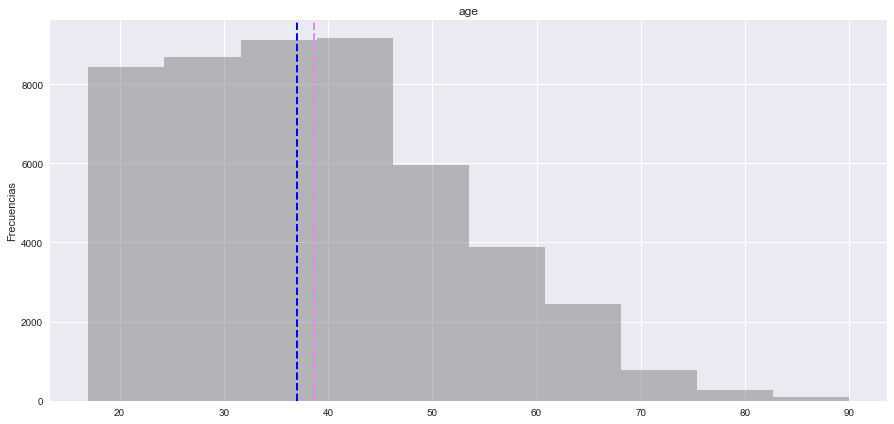


(array([1.9939e+04, 2.2790e+04, 5.2250e+03, 6.7300e+02, 1.5100e+02,
       3.5000e+01, 1.5000e+01, 7.0000e+00, 3.0000e+00, 4.0000e+00]), array([  12285. ,  160096.5,  307908. ,  455719.5,  603531. ,  751342.5,
        899154. , 1046965.5, 1194777. , 1342588.5, 1490400. ]), <a list of 10 Patch objects>)
fnlwgt
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


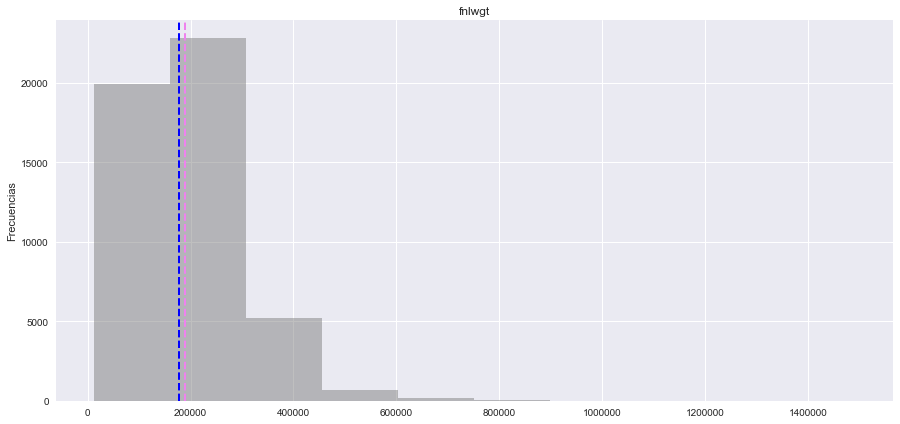


(array([  330.,   509.,  1711.,  1389.,  2469., 15784., 12939.,  1601.,
       10682.,  1428.]), array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]), <a list of 10 Patch objects>)
educational_num
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


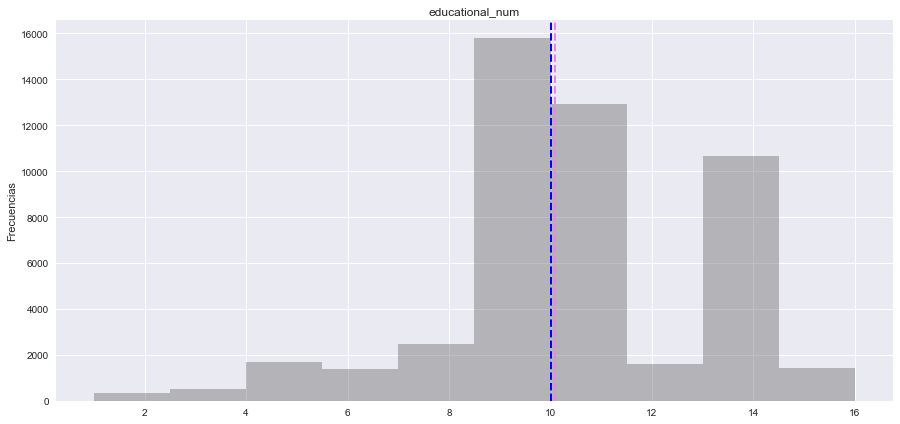


(array([4.7708e+04, 7.5300e+02, 1.2800e+02, 6.0000e+00, 3.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.4400e+02]), array([    0. ,  9999.9, 19999.8, 29999.7, 39999.6, 49999.5, 59999.4,
       69999.3, 79999.2, 89999.1, 99999. ]), <a list of 10 Patch objects>)
capital_gain
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


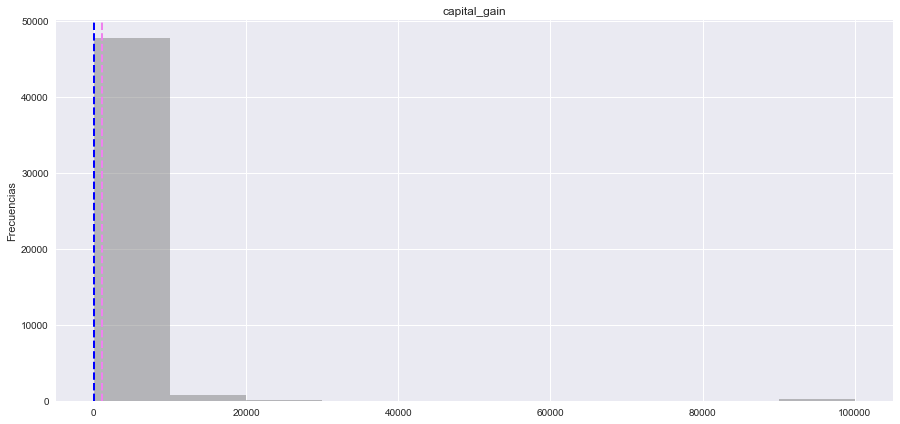


(array([4.6574e+04, 2.3000e+01, 2.9000e+01, 7.0600e+02, 1.1690e+03,
       3.0700e+02, 2.1000e+01, 2.0000e+00, 8.0000e+00, 3.0000e+00]), array([   0. ,  435.6,  871.2, 1306.8, 1742.4, 2178. , 2613.6, 3049.2,
       3484.8, 3920.4, 4356. ]), <a list of 10 Patch objects>)
capital_loss
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


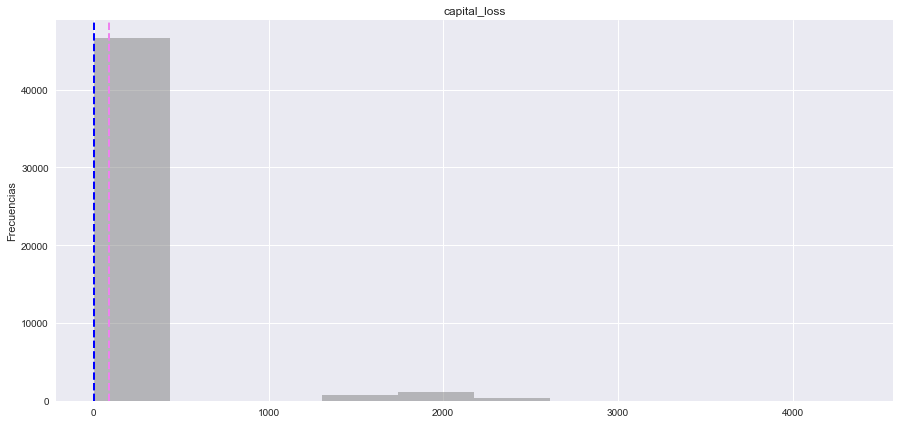


(array([ 1125.,  3328.,  3398., 26639.,  4671.,  5828.,  2642.,   683.,
         315.,   213.]), array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]), <a list of 10 Patch objects>)
hours_per_week
Text(0, 0.5, 'Frecuencias')
Line2D(_line0)
Line2D(_line1)


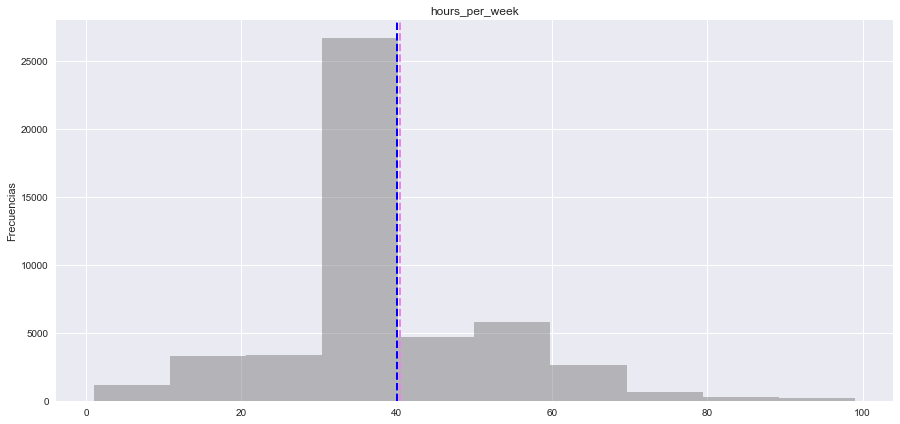

In [23]:
numericas=["age","fnlwgt","educational_num","capital_gain","capital_loss","hours_per_week"]

for i in numericas:
    histograma(df,i,mean=True,mediana=True)
    plt.title(i)
    plt.show()
    print()

Podemos observar en los gráficos que la media es siempre mayor que la mediana, por lo que podemos concluir que las variables tienen:
* ##### distribución asimétrica con cola derecha (mayor concentración de datos en los valores más pequeños)  

In [24]:
#Gráficos de barras para las variables cualitativas

def graf_barra(df):
    
    """
    Argumentos de la función:
    df: La función debe ingresar un objeto DataFrame.
    var : Variable a inspeccionar.
    
    La función retorna gráficos de barra para cada una de las variables en cuestión
    """
    
    for i in df.columns:
        if(df[i].dtype=="object"):
            sns.countplot(x=i,data=df)
            plt.title(i)
            plt.show()

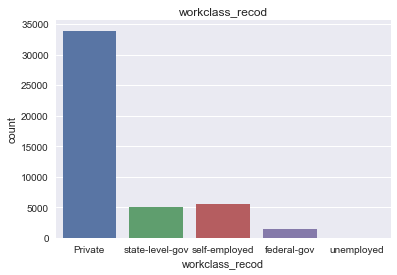

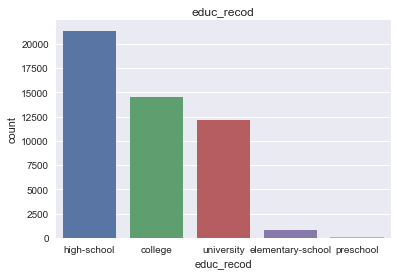

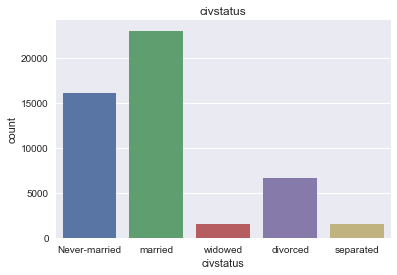

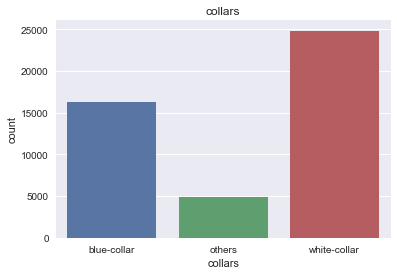

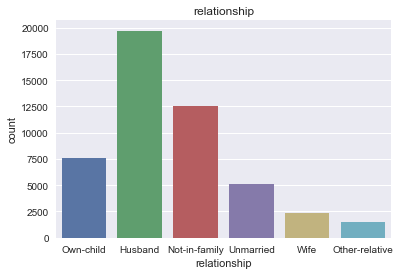

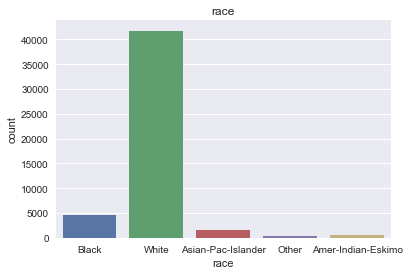

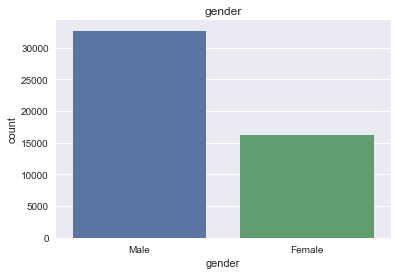

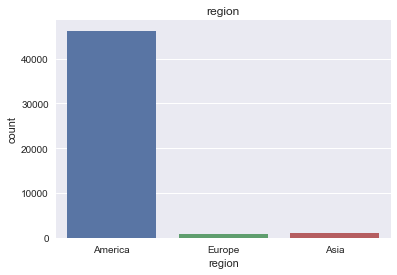

In [25]:
graf_barra(df)

#### Modelación descriptiva:

In [26]:
#Elimino definitivamente los na del dataframe para la modelación:

df=df.dropna()
df.head()

,age,workclass_recod,fnlwgt,educ_recod,educational_num,civstatus,collars,relationship,race,gender,capital_gain,capital_loss,hours_per_week,region,income
0,25,Private,226802,high-school,7,Never-married,blue-collar,Own-child,Black,Male,0,0,40,America,0
1,38,Private,89814,high-school,9,married,blue-collar,Husband,White,Male,0,0,50,America,0
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,0,0,40,America,1
3,44,Private,160323,college,10,married,blue-collar,Husband,Black,Male,7688,0,40,America,1
5,34,Private,198693,high-school,6,Never-married,others,Not-in-family,White,Male,0,0,30,America,0


In [27]:
#Se procede a armar una regresión logística desde la Econometría para poder analizar los principales regresores de la
#variable objetivo

modelo= smf.logit("income ~ age+workclass_recod+fnlwgt+educ_recod+educational_num+civstatus+collars+relationship+race+gender+capital_gain+capital_loss+hours_per_week+region",df).fit()

Optimization terminated successfully.
         Current function value: 0.331736
         Iterations 11


In [28]:
modelo.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                   Results: Logit
====================================================================================
Model:                     Logit                  Pseudo R-squared:       0.408     
Dependent Variable:        income                 AIC:                    30069.5728
Date:                      2019-05-29 16:53       BIC:                    30357.3109
No. Observations:          45222                  Log-Likelihood:         -15002.   
Df Model:                  32                     LL-Null:                -25322.   
Df Residuals:              45189                  LLR p-value:            0.0000    
Converged:                 1.0000                 Scale:                  1.0000    
No. Iterations:            11.0000                                                  
------------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z     P>|z|   [0.025   0.975]
------------------------------------------------------------------------------------
Intercept                          -8.6853   0.3014 -28.8202 0.0000  -9.2760 -8.0947
workclass_recod[T.federal-gov]      0.4478   0.0750   5.9717 0.0000   0.3008  0.5947
workclass_recod[T.self-employed]   -0.3448   0.0422  -8.1651 0.0000  -0.4276 -0.2621
workclass_recod[T.state-level-gov] -0.0720   0.0459  -1.5689 0.1167  -0.1619  0.0179
workclass_recod[T.unemployed]      -1.1050   0.8001  -1.3811 0.1672  -2.6731  0.4631
educ_recod[T.elementary-school]     0.1427   0.2372   0.6016 0.5474  -0.3222  0.6076
educ_recod[T.high-school]          -0.0663   0.0467  -1.4182 0.1561  -0.1579  0.0253
educ_recod[T.preschool]            -3.9800   4.0568  -0.9811 0.3266 -11.9312  3.9711
educ_recod[T.university]            0.0855   0.0608   1.4072 0.1594  -0.0336  0.2047
civstatus[T.divorced]               0.4865   0.0722   6.7375 0.0000   0.3450  0.6281
civstatus[T.married]                1.2898   0.1365   9.4462 0.0000   1.0222  1.5574
civstatus[T.separated]              0.4568   0.1345   3.3969 0.0007   0.1932  0.7203
civstatus[T.widowed]                0.5746   0.1326   4.3322 0.0000   0.3146  0.8346
collars[T.others]                  -0.7317   0.0869  -8.4216 0.0000  -0.9019 -0.5614
collars[T.white-collar]             0.6013   0.0354  17.0029 0.0000   0.5320  0.6706
relationship[T.Not-in-family]      -0.9612   0.1338  -7.1866 0.0000  -1.2233 -0.6991
relationship[T.Other-relative]     -1.4251   0.1870  -7.6210 0.0000  -1.7915 -1.0586
relationship[T.Own-child]          -1.9391   0.1662 -11.6689 0.0000  -2.2648 -1.6134
relationship[T.Unmarried]          -1.1932   0.1503  -7.9403 0.0000  -1.4878 -0.8987
relationship[T.Wife]                1.0586   0.0841  12.5844 0.0000   0.8937  1.2235
race[T.Asian-Pac-Islander]          0.6116   0.2176   2.8110 0.0049   0.1852  1.0380
race[T.Black]                       0.2648   0.1891   1.4004 0.1614  -0.1058  0.6355
race[T.Other]                       0.2205   0.2724   0.8094 0.4183  -0.3134  0.7544
race[T.White]                       0.5093   0.1797   2.8341 0.0046   0.1571  0.8615
gender[T.Male]                      0.7798   0.0643  12.1355 0.0000   0.6539  0.9058
region[T.Asia]                     -0.2669   0.1448  -1.8437 0.0652  -0.5506  0.0168
region[T.Europe]                    0.2055   0.1057   1.9431 0.0520  -0.0018  0.4127
age                                 0.0253   0.0014  18.6823 0.0000   0.0226  0.0279
fnlwgt                              0.0000   0.0000   5.2070 0.0000   0.0000  0.0000
educational_num                     0.2764   0.0160  17.2363 0.0000   0.2450  0.3079
capital_gain                        0.0003   0.0000  36.9001 0.0000   0.0003  0.0003
capital_loss                        0.0007   0.0000  21.3033 0.0000   0.0006  0.0007
hours_per_week                      0.0297   0.0013  22.4619 0.0000   0.0271  0.0322
============================================================================

Con una explicación del modelo de un 40.8% (dato que nos brinda r2) y un p-value menor a 0.05 determinamos que podemos continuar trabajando con el mismo. Existen muchas variables que hay que sacar ya que p>0.05 por lo tanto no son significativos para el análisis de nuestra variable objetivo

In [29]:
#comenzamos eliminando educ_recod y generamos nuevamente el modelo

modelo_sin_educ= smf.logit("income ~ age+workclass_recod+fnlwgt+educational_num+civstatus+collars+relationship+race+gender+capital_gain+capital_loss+hours_per_week+region",df).fit()

Optimization terminated successfully.
         Current function value: 0.331825
         Iterations 9


In [30]:
modelo_sin_educ.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                  Results: Logit
===================================================================================
Model:                    Logit                  Pseudo R-squared:       0.407     
Dependent Variable:       income                 AIC:                    30069.5420
Date:                     2019-05-29 16:53       BIC:                    30322.4029
No. Observations:         45222                  Log-Likelihood:         -15006.   
Df Model:                 28                     LL-Null:                -25322.   
Df Residuals:             45193                  LLR p-value:            0.0000    
Converged:                1.0000                 Scale:                  1.0000    
No. Iterations:           9.0000                                                   
-----------------------------------------------------------------------------------
                                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------------------------
Intercept                          -8.9326   0.2603 -34.3153 0.0000 -9.4428 -8.4224
workclass_recod[T.federal-gov]      0.4457   0.0749   5.9511 0.0000  0.2989  0.5924
workclass_recod[T.self-employed]   -0.3458   0.0422  -8.1888 0.0000 -0.4285 -0.2630
workclass_recod[T.state-level-gov] -0.0698   0.0458  -1.5223 0.1279 -0.1596  0.0201
workclass_recod[T.unemployed]      -1.1282   0.8006  -1.4092 0.1588 -2.6973  0.4410
civstatus[T.divorced]               0.4812   0.0721   6.6777 0.0000  0.3399  0.6224
civstatus[T.married]                1.2881   0.1365   9.4362 0.0000  1.0206  1.5557
civstatus[T.separated]              0.4469   0.1343   3.3275 0.0009  0.1837  0.7102
civstatus[T.widowed]                0.5649   0.1325   4.2631 0.0000  0.3052  0.8247
collars[T.others]                  -0.7277   0.0869  -8.3758 0.0000 -0.8980 -0.5574
collars[T.white-collar]             0.6107   0.0351  17.4198 0.0000  0.5420  0.6794
relationship[T.Not-in-family]      -0.9577   0.1337  -7.1626 0.0000 -1.2198 -0.6956
relationship[T.Other-relative]     -1.4226   0.1871  -7.6033 0.0000 -1.7893 -1.0559
relationship[T.Own-child]          -1.9357   0.1661 -11.6536 0.0000 -2.2613 -1.6101
relationship[T.Unmarried]          -1.1900   0.1503  -7.9199 0.0000 -1.4845 -0.8955
relationship[T.Wife]                1.0562   0.0841  12.5616 0.0000  0.8914  1.2210
race[T.Asian-Pac-Islander]          0.6121   0.2173   2.8160 0.0049  0.1861  1.0380
race[T.Black]                       0.2625   0.1889   1.3897 0.1646 -0.1077  0.6328
race[T.Other]                       0.2313   0.2724   0.8489 0.3960 -0.3027  0.7653
race[T.White]                       0.5081   0.1795   2.8308 0.0046  0.1563  0.8599
gender[T.Male]                      0.7814   0.0642  12.1630 0.0000  0.6555  0.9073
region[T.Asia]                     -0.2651   0.1446  -1.8332 0.0668 -0.5485  0.0183
region[T.Europe]                    0.2120   0.1058   2.0038 0.0451  0.0046  0.4193
age                                 0.0253   0.0013  18.7647 0.0000  0.0227  0.0280
fnlwgt                              0.0000   0.0000   5.2479 0.0000  0.0000  0.0000
educational_num                     0.2992   0.0073  41.1214 0.0000  0.2849  0.3135
capital_gain                        0.0003   0.0000  36.8975 0.0000  0.0003  0.0003
capital_loss                        0.0007   0.0000  21.3125 0.0000  0.0006  0.0007
hours_per_week                      0.0297   0.0013  22.4482 0.0000  0.0271  0.0322
===================================================================================

"""

Seguimos observando variables que hay que continuar sacando para dejar el modelo optimizado

In [31]:
#Las segundas variables a sacar son [T.state-level-gov] y [T.unemployed], por lo que tengo que codificar la variable
#workclass_recod con el objetivo de poder dividir cada valor que asume la variable en distintas columnas

for i in df["workclass_recod"].unique():
    print (i)
    df[i]=np.where(df["workclass_recod"]==i,1,0)

Private
state-level-gov
self-employed
federal-gov
unemployed


In [32]:
df.head()

,age,workclass_recod,fnlwgt,educ_recod,educational_num,civstatus,collars,relationship,race,gender,capital_gain,capital_loss,hours_per_week,region,income,Private,state-level-gov,self-employed,federal-gov,unemployed
0,25,Private,226802,high-school,7,Never-married,blue-collar,Own-child,Black,Male,0,0,40,America,0,1,0,0,0,0
1,38,Private,89814,high-school,9,married,blue-collar,Husband,White,Male,0,0,50,America,0,1,0,0,0,0
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,0,0,40,America,1,0,1,0,0,0
3,44,Private,160323,college,10,married,blue-collar,Husband,Black,Male,7688,0,40,America,1,1,0,0,0,0
5,34,Private,198693,high-school,6,Never-married,others,Not-in-family,White,Male,0,0,30,America,0,1,0,0,0,0


In [33]:
#renombro las columnas para evitar problemas con los "-" en el modelo

df=df.rename(columns={"state-level-gov": "state_level_gov",
                      "self-employed":"self_employed",
                      "federal-gov":"federal_gov"
                     })
                      

In [34]:
#elimino las variables [T.state_level_gov] y [T.unemployed]

modelo_sineduc_sinwork= smf.logit("income ~ age+fnlwgt+educational_num+civstatus+collars+relationship+race+gender+capital_gain+capital_loss+hours_per_week+region+Private+self_employed+federal_gov",df).fit()

Optimization terminated successfully.
         Current function value: 0.331848
         Iterations 9


In [35]:
modelo_sineduc_sinwork.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                    Logit                Pseudo R-squared:     0.407     
Dependent Variable:       income               AIC:                  30069.6464
Date:                     2019-05-29 16:53     BIC:                  30313.7878
No. Observations:         45222                Log-Likelihood:       -15007.   
Df Model:                 27                   LL-Null:              -25322.   
Df Residuals:             45194                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           9.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                      -9.0033   0.2641 -34.0860 0.0000 -9.5210 -8.4856
civstatus[T.divorced]           0.4818   0.0721   6.6867 0.0000  0.3406  0.6230
civstatus[T.married]            1.2867   0.1365   9.4293 0.0000  1.0193  1.5542
civstatus[T.separated]          0.4474   0.1343   3.3309 0.0009  0.1841  0.7107
civstatus[T.widowed]            0.5663   0.1325   4.2737 0.0000  0.3066  0.8260
collars[T.others]              -0.7279   0.0869  -8.3785 0.0000 -0.8982 -0.5576
collars[T.white-collar]         0.6109   0.0351  17.4254 0.0000  0.5422  0.6796
relationship[T.Not-in-family]  -0.9592   0.1337  -7.1764 0.0000 -1.2212 -0.6973
relationship[T.Other-relative] -1.4235   0.1871  -7.6085 0.0000 -1.7902 -1.0568
relationship[T.Own-child]      -1.9388   0.1660 -11.6808 0.0000 -2.2642 -1.6135
relationship[T.Unmarried]      -1.1917   0.1502  -7.9336 0.0000 -1.4861 -0.8973
relationship[T.Wife]            1.0550   0.0841  12.5496 0.0000  0.8902  1.2198
race[T.Asian-Pac-Islander]      0.6113   0.2173   2.8124 0.0049  0.1853  1.0373
race[T.Black]                   0.2625   0.1889   1.3897 0.1646 -0.1077  0.6328
race[T.Other]                   0.2308   0.2724   0.8473 0.3968 -0.3031  0.7648
race[T.White]                   0.5072   0.1795   2.8260 0.0047  0.1554  0.8590
gender[T.Male]                  0.7812   0.0642  12.1600 0.0000  0.6553  0.9071
region[T.Asia]                 -0.2662   0.1446  -1.8410 0.0656 -0.5496  0.0172
region[T.Europe]                0.2124   0.1058   2.0077 0.0447  0.0051  0.4197
age                             0.0253   0.0013  18.7341 0.0000  0.0226  0.0279
fnlwgt                          0.0000   0.0000   5.2463 0.0000  0.0000  0.0000
educational_num                 0.2993   0.0073  41.1423 0.0000  0.2851  0.3136
capital_gain                    0.0003   0.0000  36.9016 0.0000  0.0003  0.0003
capital_loss                    0.0007   0.0000  21.3189 0.0000  0.0006  0.0007
hours_per_week                  0.0297   0.0013  22.4576 0.0000  0.0271  0.0322
Private                         0.0735   0.0458   1.6070 0.1081 -0.0162  0.1632
self_employed                  -0.2720   0.0567  -4.8003 0.0000 -0.3831 -0.1609
federal_gov                     0.5191   0.0835   6.2136 0.0000  0.3554  0.6829
===============================================================================

"""

In [36]:
#elimino Private

modelo_sineduc_sinwork= smf.logit("income ~ age+fnlwgt+educational_num+civstatus+collars+relationship+race+gender+capital_gain+capital_loss+hours_per_week+region+self_employed+federal_gov",df).fit()

Optimization terminated successfully.
         Current function value: 0.331876
         Iterations 9


In [37]:
modelo_sineduc_sinwork.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                    Logit                Pseudo R-squared:     0.407     
Dependent Variable:       income               AIC:                  30070.2379
Date:                     2019-05-29 16:53     BIC:                  30305.6601
No. Observations:         45222                Log-Likelihood:       -15008.   
Df Model:                 26                   LL-Null:              -25322.   
Df Residuals:             45195                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           9.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                      -8.9317   0.2604 -34.3056 0.0000 -9.4420 -8.4214
civstatus[T.divorced]           0.4816   0.0721   6.6841 0.0000  0.3404  0.6229
civstatus[T.married]            1.2877   0.1365   9.4342 0.0000  1.0202  1.5553
civstatus[T.separated]          0.4475   0.1343   3.3312 0.0009  0.1842  0.7109
civstatus[T.widowed]            0.5673   0.1325   4.2817 0.0000  0.3076  0.8270
collars[T.others]              -0.7287   0.0869  -8.3889 0.0000 -0.8989 -0.5584
collars[T.white-collar]         0.6122   0.0350  17.4696 0.0000  0.5435  0.6809
relationship[T.Not-in-family]  -0.9566   0.1337  -7.1549 0.0000 -1.2186 -0.6945
relationship[T.Other-relative] -1.4200   0.1871  -7.5908 0.0000 -1.7867 -1.0534
relationship[T.Own-child]      -1.9364   0.1660 -11.6660 0.0000 -2.2617 -1.6111
relationship[T.Unmarried]      -1.1913   0.1503  -7.9286 0.0000 -1.4858 -0.8968
relationship[T.Wife]            1.0572   0.0841  12.5738 0.0000  0.8924  1.2220
race[T.Asian-Pac-Islander]      0.6206   0.2173   2.8555 0.0043  0.1946  1.0466
race[T.Black]                   0.2670   0.1890   1.4130 0.1577 -0.1034  0.6375
race[T.Other]                   0.2409   0.2724   0.8844 0.3765 -0.2930  0.7749
race[T.White]                   0.5166   0.1795   2.8779 0.0040  0.1648  0.8684
gender[T.Male]                  0.7859   0.0642  12.2449 0.0000  0.6601  0.9117
region[T.Asia]                 -0.2641   0.1446  -1.8267 0.0677 -0.5474  0.0193
region[T.Europe]                0.2150   0.1058   2.0325 0.0421  0.0077  0.4223
age                             0.0251   0.0013  18.6682 0.0000  0.0225  0.0278
fnlwgt                          0.0000   0.0000   5.2588 0.0000  0.0000  0.0000
educational_num                 0.2975   0.0072  41.4485 0.0000  0.2834  0.3115
capital_gain                    0.0003   0.0000  36.9229 0.0000  0.0003  0.0003
capital_loss                    0.0007   0.0000  21.3342 0.0000  0.0006  0.0007
hours_per_week                  0.0297   0.0013  22.4904 0.0000  0.0271  0.0323
self_employed                  -0.3338   0.0416  -8.0290 0.0000 -0.4153 -0.2523
federal_gov                     0.4583   0.0745   6.1556 0.0000  0.3124  0.6043
===============================================================================

"""

In [38]:
#binarizo la variable raza para poder hacer la separación en columnas y elegir qué variables sacar

for i in df["race"].unique():
    print (i)
    df[i]=np.where(df["race"]==i,1,0)

Black
White
Other
Amer-Indian-Eskimo
Asian-Pac-Islander


In [39]:
df.head()

,age,workclass_recod,fnlwgt,educ_recod,educational_num,civstatus,collars,relationship,race,gender,...,Private,state_level_gov,self_employed,federal_gov,unemployed,Black,White,Other,Amer-Indian-Eskimo,Asian-Pac-Islander
0,25,Private,226802,high-school,7,Never-married,blue-collar,Own-child,Black,Male,...,1,0,0,0,0,1,0,0,0,0
1,38,Private,89814,high-school,9,married,blue-collar,Husband,White,Male,...,1,0,0,0,0,0,1,0,0,0
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,...,0,1,0,0,0,0,1,0,0,0
3,44,Private,160323,college,10,married,blue-collar,Husband,Black,Male,...,1,0,0,0,0,1,0,0,0,0
5,34,Private,198693,high-school,6,Never-married,others,Not-in-family,White,Male,...,1,0,0,0,0,0,1,0,0,0


In [40]:
#renombro las columnas para evitar problemas con los "-" en el modelo

df=df.rename(columns={"Amer-Indian-Eskimo": "Amer_Indian_Eskimo",
                      "Asian-Pac-Islander":"Asian_Pac_Islander"
                     })

In [41]:
#elimino Black y other

modelo_sineduc_sinwork_sinraza= smf.logit("income ~ age+fnlwgt+educational_num+civstatus+collars+relationship+gender+capital_gain+capital_loss+hours_per_week+region+self_employed+federal_gov+White+Asian_Pac_Islander",df).fit()

Optimization terminated successfully.
         Current function value: 0.331899
         Iterations 9


In [42]:
modelo_sineduc_sinwork_sinraza.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                    Logit                Pseudo R-squared:     0.407     
Dependent Variable:       income               AIC:                  30068.3001
Date:                     2019-05-29 16:54     BIC:                  30286.2836
No. Observations:         45222                Log-Likelihood:       -15009.   
Df Model:                 24                   LL-Null:              -25322.   
Df Residuals:             45197                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           9.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                      -8.6962   0.1984 -43.8295 0.0000 -9.0851 -8.3074
civstatus[T.divorced]           0.4804   0.0721   6.6676 0.0000  0.3392  0.6217
civstatus[T.married]            1.2846   0.1364   9.4151 0.0000  1.0172  1.5520
civstatus[T.separated]          0.4493   0.1343   3.3446 0.0008  0.1860  0.7126
civstatus[T.widowed]            0.5650   0.1325   4.2646 0.0000  0.3053  0.8247
collars[T.others]              -0.7279   0.0869  -8.3798 0.0000 -0.8981 -0.5576
collars[T.white-collar]         0.6116   0.0350  17.4551 0.0000  0.5429  0.6803
relationship[T.Not-in-family]  -0.9592   0.1336  -7.1776 0.0000 -1.2212 -0.6973
relationship[T.Other-relative] -1.4207   0.1870  -7.5955 0.0000 -1.7873 -1.0541
relationship[T.Own-child]      -1.9380   0.1660 -11.6769 0.0000 -2.2633 -1.6127
relationship[T.Unmarried]      -1.1927   0.1502  -7.9423 0.0000 -1.4871 -0.8984
relationship[T.Wife]            1.0570   0.0841  12.5705 0.0000  0.8922  1.2218
gender[T.Male]                  0.7849   0.0642  12.2305 0.0000  0.6592  0.9107
region[T.Asia]                 -0.2651   0.1442  -1.8383 0.0660 -0.5478  0.0175
region[T.Europe]                0.2154   0.1058   2.0363 0.0417  0.0081  0.4227
age                             0.0252   0.0013  18.7245 0.0000  0.0225  0.0278
fnlwgt                          0.0000   0.0000   5.4125 0.0000  0.0000  0.0000
educational_num                 0.2976   0.0072  41.4717 0.0000  0.2835  0.3117
capital_gain                    0.0003   0.0000  36.9111 0.0000  0.0003  0.0003
capital_loss                    0.0007   0.0000  21.3447 0.0000  0.0006  0.0007
hours_per_week                  0.0297   0.0013  22.4892 0.0000  0.0271  0.0323
self_employed                  -0.3345   0.0416  -8.0453 0.0000 -0.4159 -0.2530
federal_gov                     0.4582   0.0744   6.1558 0.0000  0.3123  0.6041
White                           0.2786   0.0576   4.8355 0.0000  0.1657  0.3916
Asian_Pac_Islander              0.3836   0.1354   2.8326 0.0046  0.1182  0.6491
===============================================================================

"""

In [43]:
#binarizo region

for i in df["region"].unique():
    print (i)
    df[i]=np.where(df["region"]==i,1,0)

America
Europe
Asia


In [44]:
df.head()

,age,workclass_recod,fnlwgt,educ_recod,educational_num,civstatus,collars,relationship,race,gender,...,federal_gov,unemployed,Black,White,Other,Amer_Indian_Eskimo,Asian_Pac_Islander,America,Europe,Asia
0,25,Private,226802,high-school,7,Never-married,blue-collar,Own-child,Black,Male,...,0,0,1,0,0,0,0,1,0,0
1,38,Private,89814,high-school,9,married,blue-collar,Husband,White,Male,...,0,0,0,1,0,0,0,1,0,0
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,...,0,0,0,1,0,0,0,1,0,0
3,44,Private,160323,college,10,married,blue-collar,Husband,Black,Male,...,0,0,1,0,0,0,0,1,0,0
5,34,Private,198693,high-school,6,Never-married,others,Not-in-family,White,Male,...,0,0,0,1,0,0,0,1,0,0


In [45]:
#elimino Asia

modelo_sineduc_sinwork_sinraza_sinregion= smf.logit("income ~ age+fnlwgt+educational_num+civstatus+collars+relationship+gender+capital_gain+capital_loss+hours_per_week+self_employed+federal_gov+White+Asian_Pac_Islander+Europe",df).fit()

Optimization terminated successfully.
         Current function value: 0.331937
         Iterations 9


In [46]:
modelo_sineduc_sinwork_sinraza_sinregion.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                                Results: Logit
===============================================================================
Model:                    Logit                Pseudo R-squared:     0.407     
Dependent Variable:       income               AIC:                  30069.6753
Date:                     2019-05-29 16:54     BIC:                  30278.9394
No. Observations:         45222                Log-Likelihood:       -15011.   
Df Model:                 23                   LL-Null:              -25322.   
Df Residuals:             45198                LLR p-value:          0.0000    
Converged:                1.0000               Scale:                1.0000    
No. Iterations:           9.0000                                               
-------------------------------------------------------------------------------
                                Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------------------
Intercept                      -8.6833   0.1983 -43.7898 0.0000 -9.0719 -8.2946
civstatus[T.divorced]           0.4798   0.0720   6.6595 0.0000  0.3386  0.6210
civstatus[T.married]            1.2766   0.1364   9.3577 0.0000  1.0092  1.5440
civstatus[T.separated]          0.4487   0.1343   3.3416 0.0008  0.1855  0.7119
civstatus[T.widowed]            0.5643   0.1325   4.2587 0.0000  0.3046  0.8239
collars[T.others]              -0.7303   0.0868  -8.4085 0.0000 -0.9005 -0.5600
collars[T.white-collar]         0.6116   0.0350  17.4570 0.0000  0.5430  0.6803
relationship[T.Not-in-family]  -0.9653   0.1336  -7.2228 0.0000 -1.2273 -0.7034
relationship[T.Other-relative] -1.4300   0.1869  -7.6503 0.0000 -1.7963 -1.0636
relationship[T.Own-child]      -1.9406   0.1660 -11.6867 0.0000 -2.2660 -1.6151
relationship[T.Unmarried]      -1.1988   0.1502  -7.9821 0.0000 -1.4931 -0.9044
relationship[T.Wife]            1.0561   0.0841  12.5612 0.0000  0.8913  1.2209
gender[T.Male]                  0.7840   0.0642  12.2166 0.0000  0.6582  0.9098
age                             0.0252   0.0013  18.7378 0.0000  0.0226  0.0278
fnlwgt                          0.0000   0.0000   5.3742 0.0000  0.0000  0.0000
educational_num                 0.2969   0.0072  41.4507 0.0000  0.2829  0.3110
capital_gain                    0.0003   0.0000  36.9149 0.0000  0.0003  0.0003
capital_loss                    0.0007   0.0000  21.3329 0.0000  0.0006  0.0007
hours_per_week                  0.0297   0.0013  22.4921 0.0000  0.0271  0.0323
self_employed                  -0.3336   0.0416  -8.0252 0.0000 -0.4150 -0.2521
federal_gov                     0.4601   0.0744   6.1817 0.0000  0.3142  0.6060
White                           0.2804   0.0576   4.8668 0.0000  0.1675  0.3934
Asian_Pac_Islander              0.2179   0.1020   2.1366 0.0326  0.0180  0.4177
Europe                          0.2175   0.1058   2.0564 0.0397  0.0102  0.4248
===============================================================================

"""

En este punto ya eliminamos todas las variables que no eran relevantes para nuestro modelo. Podemos hacer la siguiente observación:
* Tenemos un r2 de 0.407 lo que significa que este modelo optimizado explica prácticamente lo mismo que el modelo saturado inicial.
* Tenemos un menor BIC que nos dice que trabajar con el total de variables no suma lo suficiente al modelo

#### Modelo predictivo:

In [47]:
#Observo mi df con la totalidad de sus columnas y los primeros 100 registros

pd.set_option('display.max_columns', 30)

In [48]:
df.head(100)

,age,workclass_recod,fnlwgt,educ_recod,educational_num,civstatus,collars,relationship,race,gender,capital_gain,capital_loss,hours_per_week,region,income,Private,state_level_gov,self_employed,federal_gov,unemployed,Black,White,Other,Amer_Indian_Eskimo,Asian_Pac_Islander,America,Europe,Asia
0,25,Private,226802,high-school,7,Never-married,blue-collar,Own-child,Black,Male,0,0,40,America,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,38,Private,89814,high-school,9,married,blue-collar,Husband,White,Male,0,0,50,America,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,0,0,40,America,1,0,1,0,0,0,0,1,0,0,0,1,0,0
3,44,Private,160323,college,10,married,blue-collar,Husband,Black,Male,7688,0,40,America,1,1,0,0,0,0,1,0,0,0,0,1,0,0
5,34,Private,198693,high-school,6,Never-married,others,Not-in-family,White,Male,0,0,30,America,0,1,0,0,0,0,0,1,0,0,0,1,0,0
7,63,self-employed,104626,university,15,married,white-collar,Husband,White,Male,3103,0,32,America,1,0,0,1,0,0,0,1,0,0,0,1,0,0
8,24,Private,369667,college,10,Never-married,others,Unmarried,White,Female,0,0,40,America,0,1,0,0,0,0,0,1,0,0,0,1,0,0
9,55,Private,104996,high-school,4,married,blue-collar,Husband,White,Male,0,0,10,America,0,1,0,0,0,0,0,1,0,0,0,1,0,0
10,65,Private,184454,high-school,9,married,blue-collar,Husband,White,Male,6418,0,40,America,1,1,0,0,0,0,0,1,0,0,0,1,0,0
11,36,federal-gov,212465,university,13,married,white-collar,Husband,White,Male,0,0,40,America,0,0,0,0,1,0,0,1,0,0,0,1,0,0


In [49]:
#Defino una función que mapee de log-odds a probabilidad

def inverse_logit(x):
    
    """
    Parámetros de la función:
    x: variable a ser invertida para obtener probabilidades
    
    Tiene como objetivo calcular la probabilidad desde log-odds
    """
    return 1/(1+np.exp(-x))

In [50]:
modelo_sineduc_sinwork_sinraza_sinregion.params["Intercept"]

-8.683258295416419

In [51]:
modelo_sineduc_sinwork_sinraza_sinregion.params["civstatus[T.married]"]

1.276598577584482

In [52]:
#Pruebo mi modelo tomando un caso de ejemplo (caso: index 93) escribiendo mi función 

inverse_logit(modelo_sineduc_sinwork_sinraza_sinregion.params["Intercept"]+
              modelo_sineduc_sinwork_sinraza_sinregion.params["age"]*59 +
                modelo_sineduc_sinwork_sinraza_sinregion.params["fnlwgt"]*98984+
                modelo_sineduc_sinwork_sinraza_sinregion.params["educational_num"]*13+
                modelo_sineduc_sinwork_sinraza_sinregion.params["civstatus[T.divorced]"]*1+
                modelo_sineduc_sinwork_sinraza_sinregion.params["White"]*1+
                modelo_sineduc_sinwork_sinraza_sinregion.params["gender[T.Male]"]*1+
                modelo_sineduc_sinwork_sinraza_sinregion.params["collars[T.white-collar]"]*1+
                modelo_sineduc_sinwork_sinraza_sinregion.params["relationship[T.Not-in-family]"]*1+
                modelo_sineduc_sinwork_sinraza_sinregion.params["capital_gain"]*0+
                modelo_sineduc_sinwork_sinraza_sinregion.params["capital_loss"]*0+
                modelo_sineduc_sinwork_sinraza_sinregion.params["hours_per_week"]*40+
              modelo_sineduc_sinwork_sinraza_sinregion.params["self_employed"]*0+
              modelo_sineduc_sinwork_sinraza_sinregion.params["federal_gov"]*1)

0.39553931821633337

Este resultado significa que hay un 39.55% de probabilidad de que el individuo gane más de 50000 dólares anuales. Si vemos el dato referente a income de la persona tomada como ejemplo vemos que gana efectivamente menos de 50000 al año.

##### A continuación voy a proceder a hacer la regresión logística a través de machine learning

In [53]:
#primero que todo debo terminar de "binarizar" las variables que faltan para poder aplicar este nuevo modelo y estandarizar
#las mismas y eliminar aquellas columnas que quedaron y ya fueron binarizadas anteriormente

df.head()

,age,workclass_recod,fnlwgt,educ_recod,educational_num,civstatus,collars,relationship,race,gender,capital_gain,capital_loss,hours_per_week,region,income,Private,state_level_gov,self_employed,federal_gov,unemployed,Black,White,Other,Amer_Indian_Eskimo,Asian_Pac_Islander,America,Europe,Asia
0,25,Private,226802,high-school,7,Never-married,blue-collar,Own-child,Black,Male,0,0,40,America,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,38,Private,89814,high-school,9,married,blue-collar,Husband,White,Male,0,0,50,America,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,28,state-level-gov,336951,college,12,married,blue-collar,Husband,White,Male,0,0,40,America,1,0,1,0,0,0,0,1,0,0,0,1,0,0
3,44,Private,160323,college,10,married,blue-collar,Husband,Black,Male,7688,0,40,America,1,1,0,0,0,0,1,0,0,0,0,1,0,0
5,34,Private,198693,high-school,6,Never-married,others,Not-in-family,White,Male,0,0,30,America,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [54]:
#eliminación de columnas que ya fueron binarizadas y están en nuevas columnas

df = df.drop(["workclass_recod", "educ_recod", "race","region"], axis=1)

In [55]:
df.head()

,age,fnlwgt,educational_num,civstatus,collars,relationship,gender,capital_gain,capital_loss,hours_per_week,income,Private,state_level_gov,self_employed,federal_gov,unemployed,Black,White,Other,Amer_Indian_Eskimo,Asian_Pac_Islander,America,Europe,Asia
0,25,226802,7,Never-married,blue-collar,Own-child,Male,0,0,40,0,1,0,0,0,0,1,0,0,0,0,1,0,0
1,38,89814,9,married,blue-collar,Husband,Male,0,0,50,0,1,0,0,0,0,0,1,0,0,0,1,0,0
2,28,336951,12,married,blue-collar,Husband,Male,0,0,40,1,0,1,0,0,0,0,1,0,0,0,1,0,0
3,44,160323,10,married,blue-collar,Husband,Male,7688,0,40,1,1,0,0,0,0,1,0,0,0,0,1,0,0
5,34,198693,6,Never-married,others,Not-in-family,Male,0,0,30,0,1,0,0,0,0,0,1,0,0,0,1,0,0


In [56]:
#binarizo las variables descriptivas restantes

categoricas=["civstatus","collars","relationship","gender"]

for i in categoricas:
    for j in df[i].unique():
        label=str(i)+"_"+str(j)
        df[label]=np.where(df[i]==j,1,0)

In [57]:
df.head()

,age,fnlwgt,educational_num,civstatus,collars,relationship,gender,capital_gain,capital_loss,hours_per_week,income,Private,state_level_gov,self_employed,federal_gov,...,civstatus_married,civstatus_widowed,civstatus_separated,civstatus_divorced,collars_blue-collar,collars_others,collars_white-collar,relationship_Own-child,relationship_Husband,relationship_Not-in-family,relationship_Unmarried,relationship_Wife,relationship_Other-relative,gender_Male,gender_Female
0,25,226802,7,Never-married,blue-collar,Own-child,Male,0,0,40,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,38,89814,9,married,blue-collar,Husband,Male,0,0,50,0,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,28,336951,12,married,blue-collar,Husband,Male,0,0,40,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,44,160323,10,married,blue-collar,Husband,Male,7688,0,40,1,1,0,0,0,...,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
5,34,198693,6,Never-married,others,Not-in-family,Male,0,0,30,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [58]:
#elimino las columnas que ya no me sirven porque fueron creadas nuevas

df = df.drop(["civstatus","collars","relationship","gender"], axis=1)

In [59]:
pd.set_option('display.max_columns', 50)
df.head()

,age,fnlwgt,educational_num,capital_gain,capital_loss,hours_per_week,income,Private,state_level_gov,self_employed,federal_gov,unemployed,Black,White,Other,Amer_Indian_Eskimo,Asian_Pac_Islander,America,Europe,Asia,civstatus_Never-married,civstatus_married,civstatus_widowed,civstatus_separated,civstatus_divorced,collars_blue-collar,collars_others,collars_white-collar,relationship_Own-child,relationship_Husband,relationship_Not-in-family,relationship_Unmarried,relationship_Wife,relationship_Other-relative,gender_Male,gender_Female
0,25,226802,7,0,0,40,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
1,38,89814,9,0,0,50,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
2,28,336951,12,0,0,40,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
3,44,160323,10,7688,0,40,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0
5,34,198693,6,0,0,30,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0


In [60]:
#A partir del modelo depurado, genero un modelo predictivo con las siguientes características:

#Estandarizada la matriz.

#Genero subconjuntos de entrenamiento y validación, separando el 33% de la muestra en el conjunto de validación

x_train,x_test,y_train,y_test=train_test_split(StandardScaler().fit_transform(df[["age","fnlwgt","educational_num","civstatus_Never-married","civstatus_married","civstatus_widowed","civstatus_separated","civstatus_divorced","collars_blue-collar","collars_others","collars_white-collar","relationship_Own-child","relationship_Husband","relationship_Not-in-family","relationship_Unmarried","relationship_Wife","relationship_Other-relative","gender_Male","gender_Female","capital_gain","capital_loss","hours_per_week","self_employed","federal_gov","White","Asian_Pac_Islander","Europe"]]),df["income"],test_size=.33, random_state=2510)

In [61]:
model=LogisticRegression().fit(x_train,y_train)

In [62]:
#reporto los coeficientes del modelo

model.coef_

array([[ 0.33500682,  0.08345748,  0.74700424, -0.28826953,  0.33487172,
        -0.03386475, -0.03680943, -0.05918814, -0.06040247, -0.26619108,
         0.22277836, -0.38212218,  0.34195159, -0.10710881, -0.12719915,
         0.365697  , -0.14093056,  0.18387124, -0.18387124,  2.40130019,
         0.26149249,  0.35177343, -0.08769988,  0.07558558,  0.10645485,
         0.05036689,  0.0327483 ]])

In [63]:
#Genero la predicción de las clases y de la probabilidad.

yhat=model.predict(x_test)

yhat[:20]

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [64]:
#reporto las probabilidades asociadas a ese array

yhat_prob=model.predict_proba(x_test)[:,1]
list(map(lambda x: round(x,2),yhat_prob[:20]))

[0.57,
 0.01,
 0.74,
 0.0,
 0.03,
 0.03,
 0.47,
 0.74,
 0.09,
 0.83,
 0.02,
 0.02,
 0.11,
 0.43,
 0.01,
 0.0,
 0.15,
 0.0,
 0.01,
 0.02]

In [65]:
#Reporto las métricas de precision, recall y f1 para ambas clases.

modelo_confusion=confusion_matrix(y_test, yhat)
modelo_confusion

array([[10441,   761],
       [ 1498,  2224]], dtype=int64)

* Verdaderos positivos: 10441
* Falsos positivos: 761
* Falsos negativos: 1498
* Verdaderos negativos: 2224

In [66]:
metricas= classification_report(y_test,yhat)
print(metricas)

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     11202
           1       0.75      0.60      0.66      3722

   micro avg       0.85      0.85      0.85     14924
   macro avg       0.81      0.76      0.78     14924
weighted avg       0.84      0.85      0.84     14924



In [67]:
#calculo el accuracy aparte ya que el reporte no me lo trae

from sklearn.metrics import accuracy_score

accuracy_score(y_test,yhat)

0.8486330742428303

La métrica reportada de .8486 sugiere cierta exactitud en nuestro modelo. Sin embargo, resulta que la medida de exactitud por sí sola es engañosa, dado que no hace distinción alguna frente a los tipos de errores (Falso Negativo y Falso Positivo). Para ello utilizamos el resto de medidas extras:

* precision: Mide la fracción de predicciones correctas entre las etiquetas positivas. En nuestro caso un .75 de identificaciones positivas fueron correctas para cuando income=1 y .87 cuando income=0

* Recall (o sensibilidad): Mide la fraccion de verdaderos positivos predichos por el modelo. En nuestro caso hubo un .60 de proporción de positivos reales que se identificó correctamente cuando income=1 y .93 cuando income=0

Existe un trueque entre Precision y Recall, en la medida que ambos puntajes se pueden promediar para obtener una medida ponderada de ambos fenómenos. Esta medida se conoce como F1, y representa la media armónica entre Precision y Recall


In [68]:
#Procedo a graficar la curva Receiver Operator Characteristic para tener una forma visual de analizar el modelo utilizado.

false_positive,true_positive,thres=roc_curve(y_test,yhat_prob)

Text(0, 0.5, 'Verdaderos Positivos')

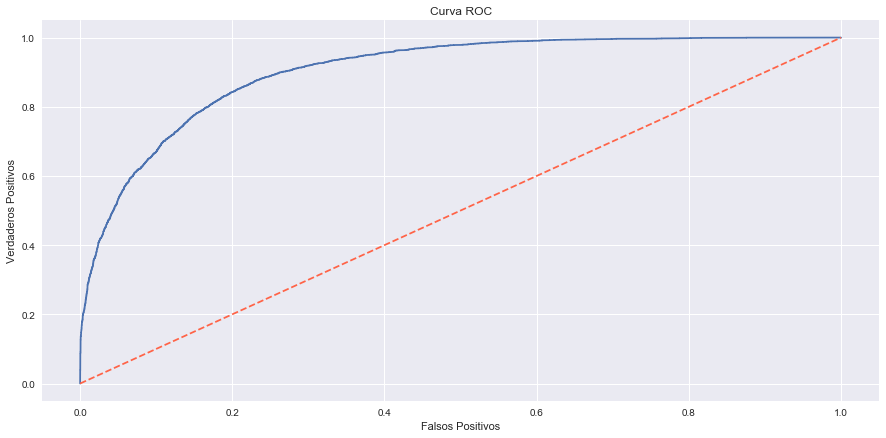

In [69]:
plt.subplots(figsize=(15,7))
plt.plot(false_positive,true_positive)
plt.plot([0,1], ls="--",color="tomato")
plt.title("Curva ROC")
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")

In [70]:
#Para estimar el área debajo de la curva

from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, yhat_prob)

0.9035516130390855

Con todo lo anterior mencionado podemos determinar que tenemos un gran modelo de clasificación para la variable objetivo "income". Además podemos agregar que el modelo hace un mejor trabajo cuando income=0, es decir cuando los ingresos son menores a 50.000 dólares anuales